# Import the libraries, load dataset, print the shape of data, data description. (4 Marks)

In [140]:
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

nltk.download('stopwords')    #download stopwords
nltk.download('punkt')

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

!pip install vaderSentiment    # Install vader sentiment package
!pip install textblob   # Install textblob package

# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score      

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kannansundararajan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kannansundararajan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Summary
Add your view and opinion along with the problem statement, shape of the data, data description.

In [141]:
df = pd.read_csv('tweets.csv')

In [142]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [143]:
df.shape

(14640, 15)

In [144]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


## Observation
The data contains 15 columns and 14,460 tweets

# Exploratory data analysis(EDA)


a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets.

b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 

c. Plot the word cloud graph of tweets for positive and negative sentiment separately.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [146]:
#Create a list with columns that categorical values
cat_cols=['airline_sentiment', 'airline']

In [147]:
def categorical_unigraphs(features):
    for i in df[features].columns:
        #sns.barplot(tour_data[i].value_counts().index,tour_data[i].value_counts()).set_title(i)
        graph = sns.barplot(df[i].value_counts().index,
                    (df[i].value_counts()/len(df)*100)).set_title(i)
        plt.ylim(0,100)
        plt.show()

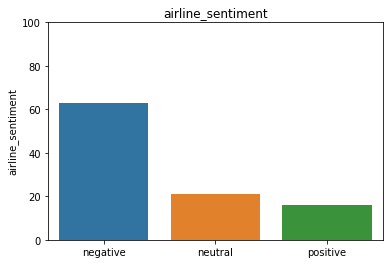

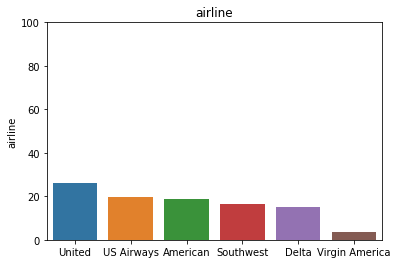

In [148]:
# Call function to print univariate graphs for continous features .
import warnings
warnings.filterwarnings("ignore")
categorical_unigraphs(cat_cols)

Observation
1. Negative tweets are highest than neutral and positive sentiments
2. United has higher percentage of tweets compared to other arlines.


In [149]:
def airlinebysentiment(feature):
    plt.figure(figsize=(20,10))
    
    total = df.groupby(by=feature)['airline_sentiment'].count().reset_index()
    negative = (df[df['airline_sentiment']=='negative']).groupby(by=feature)['airline_sentiment'].count().reset_index()
    neutral = (df[df['airline_sentiment']=='neutral']).groupby(by=feature)['airline_sentiment'].count().reset_index()
    positive = (df[df['airline_sentiment']=='positive']).groupby(by=feature)['airline_sentiment'].count().reset_index()
    
    total.rename(columns={"airline_sentiment": "total"}, inplace = True)
    negative.rename(columns={"airline_sentiment": "negative"}, inplace = True)
    neutral.rename(columns={"airline_sentiment": "neutral"}, inplace = True)
    positive.rename(columns={"airline_sentiment": "positive"}, inplace = True)
    
    total.set_index('airline', inplace = True)
    negative.set_index('airline', inplace = True)
    neutral.set_index('airline', inplace = True)
    positive.set_index('airline', inplace = True)
    
    frames = [negative, neutral, positive, total]
    df_sentiment = pd.concat(frames, axis = 1, join='inner')
    df_sentiment = df_sentiment.reset_index()
    
 
    df_sentiment['negative'] = df_sentiment['negative']/df_sentiment['total']  * 100
    df_sentiment['neutral'] = df_sentiment['neutral']/df_sentiment['total']  * 100
    df_sentiment['positive'] = df_sentiment['positive']/df_sentiment['total']  * 100
   
    
    df_sentiment['neutral'] = df_sentiment['negative'] + df_sentiment['neutral']
    df_sentiment['positive'] = df_sentiment['positive'] + df_sentiment['neutral']
    
    bar1 = sns.barplot(x= feature,  y='positive', data=df_sentiment, color='green')
    bar2 = sns.barplot(x=feature, y='neutral', data=df_sentiment, color='orange')
    bar3 = sns.barplot(x=feature, y='negative', data=df_sentiment, color='red')
 
    
    top_bar = mpatches.Patch(color='red', label='airline_sentiment = negative')
    middle_bar = mpatches.Patch(color='orange', label='airline_sentiment = neutral')
    bottom_bar = mpatches.Patch(color='green', label='airline_sentiment = positive')
    
    plt.legend(handles=[top_bar, middle_bar, bottom_bar])
    plt.ylabel("Sentiment")
    plt.title("Airline Sentiment Percentages")
    plt.show()

   
   
    

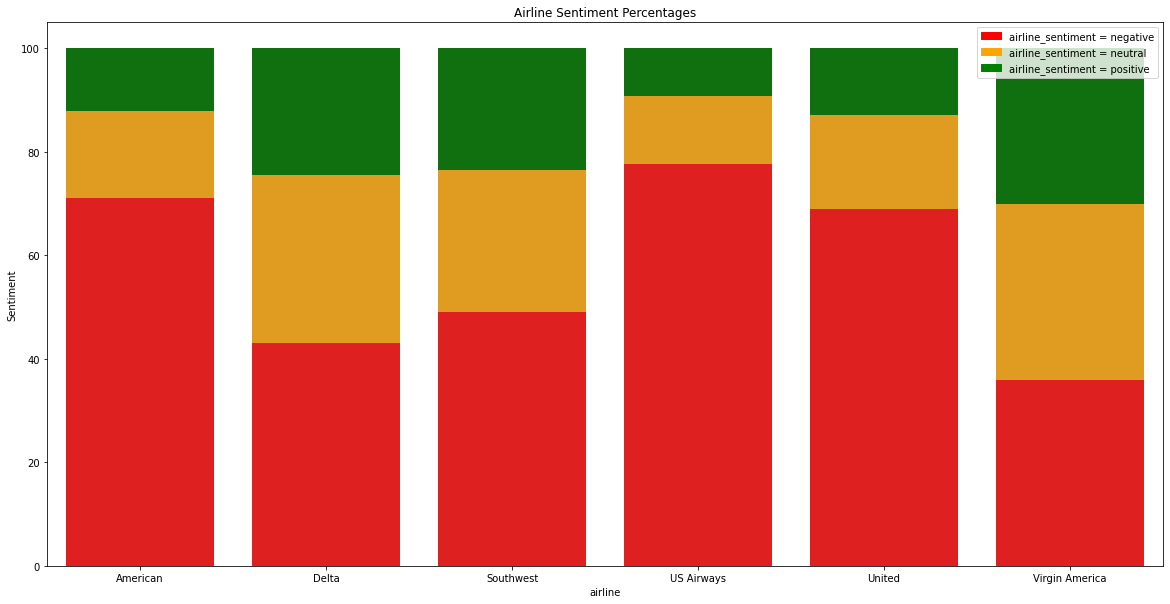

In [150]:
# Iterate each category columns to print bivariate graph.
import matplotlib.patches as mpatches
for i in df[cat_cols].columns:
    if i != 'airline_sentiment':
        airlinebysentiment(i)

Observation

All airlines have higher percentage of negative tweets compared to that of other sentiments

US Airways and American are highest percentage of negative tweets compared to that of other airlines.

Virgin America have higher percentage of positive tweets compared to other airlines

In [151]:
from wordcloud import WordCloud,STOPWORDS

In [15]:
#creating word cloud for negative reviews
positive_tweets = df[df['airline_sentiment'] == 'positive']
positive_tweets.dropna(subset = ["text"], inplace=True)
positive_tweets
words = ' '.join(positive_tweets['text'])

cleaned_word = " ".join([word for word in words.split()])

In [16]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                         ).generate(cleaned_word)

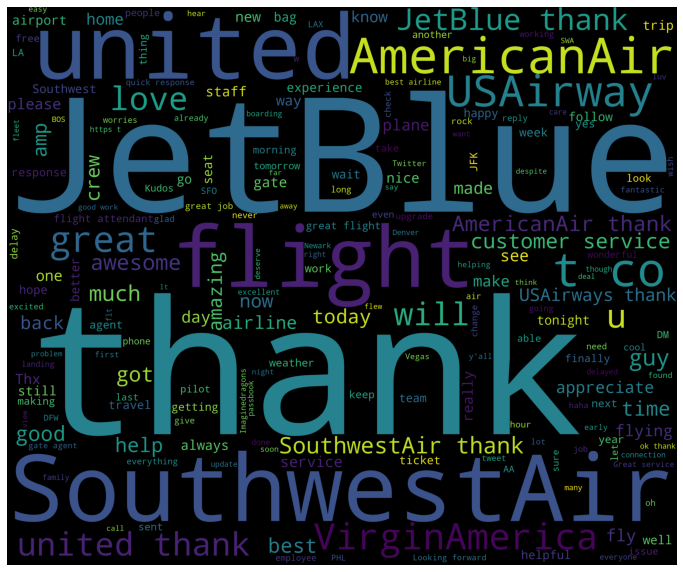

In [17]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
negative_tweets = df[df['airline_sentiment'] == 'negative']
negative_tweets.dropna(subset = ["text"], inplace=True)
#negative_tweets
words = ' '.join(negative_tweets['text'])
cleaned_word = " ".join([word for word in words.split()])

In [19]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                         ).generate(cleaned_word)

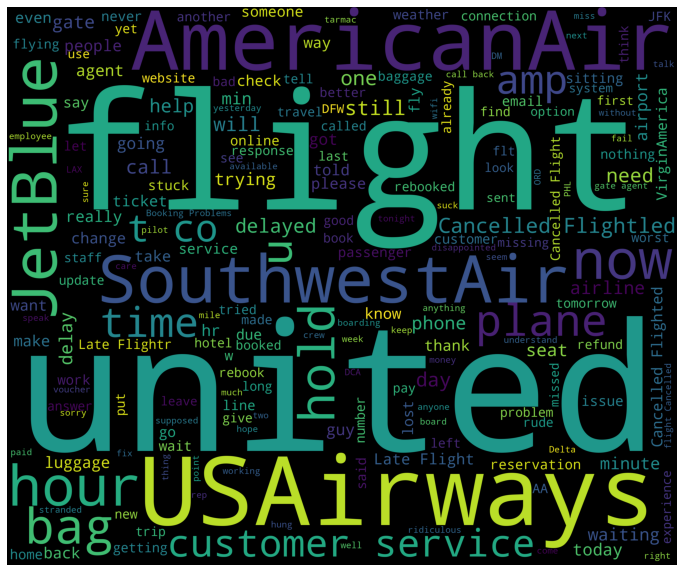

In [20]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
#creating word cloud for negative reviews
negative_reviews= df[df['airline_sentiment'] == 'negative']
negative_reviews.dropna(subset = ["negativereason"], inplace=True)
words = ' '.join(negative_reviews['negativereason'])
cleaned_word = " ".join([word for word in words.split()])

In [22]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

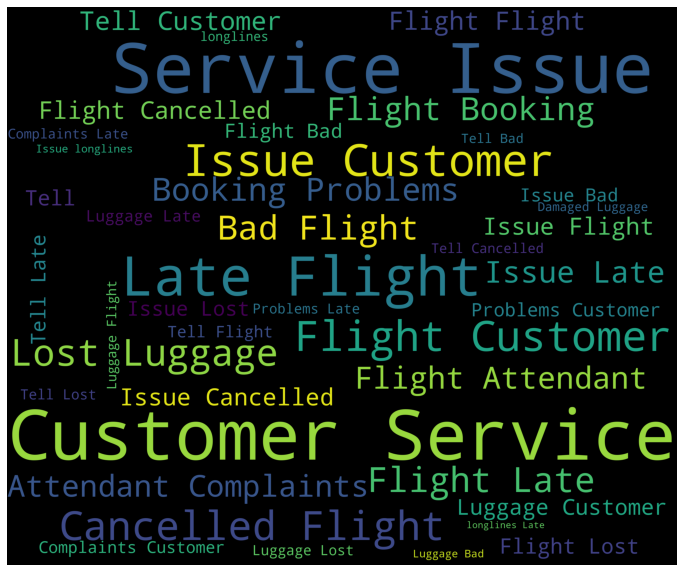

In [23]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Data Preprocessing
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.

In [152]:
#Creating a dataframe with only text and airline_sentiment column
df_model = df[['text', 'airline_sentiment']]

In [25]:
df_model.shape

(14640, 2)

In [26]:
df_model.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [27]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    return text
df_model['text'] = df_model['text'].apply(lambda x: clean_text(x))
df_model.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


Tokenize data

In [28]:
df_model['text'] = df_model.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
df_model.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, com...",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, is, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, is, a, really, big...",negative


Remove stopwords

In [29]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

#data['review'] = data['review'].astype(str)
df_model['text'] = df_model.apply(lambda row: normalize(row['text']), axis=1)

In [30]:
df_model.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience ...,positive
2,virginamerica today must mean need take anothe...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


# Preparing to Develop Model using Countvectorizer and TF IDF

In [31]:
replaceStruct = {
                "airline_sentiment": {"positive": 1, "neutral": 0, "negative": 0}
                }

In [32]:
df_model=df_model.replace(replaceStruct)

In [55]:
df_model['airline_sentiment'].value_counts()

0    12277
1     2363
Name: airline_sentiment, dtype: int64

<AxesSubplot:>

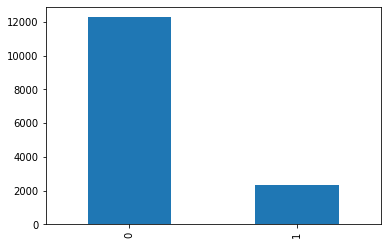

In [56]:
df_model['airline_sentiment'].value_counts().plot.bar()

## Countvectorizer

In [57]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=500)                # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(df_model['text'])

data_features = data_features.toarray()  # Convert the data features to array.




In [69]:
data_features.shape
print(data_features)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [68]:
X = data_features
y = df_model['airline_sentiment']

In [78]:
X.shape

(14640, 500)

In [70]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [71]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [72]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    print(type(clf))
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    print(scores)
    cv_scores.append(scores.mean())
cv_scores

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0.87112933 0.88342441 0.62021858 0.2363388  0.90118397]
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0.87477231 0.88615665 0.61429872 0.23406193 0.89845173]
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0.87386157 0.88661202 0.62477231 0.24134791 0.89799636]


[0.7024590163934427, 0.7015482695810565, 0.7049180327868851]

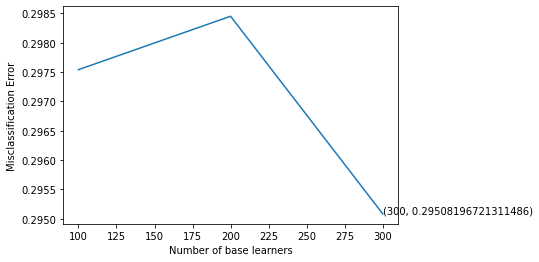

In [73]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

Observation: Estimator 300 have minimum error 

In [74]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['1' , '0']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95      3204
           0       0.70      0.59      0.64       456

    accuracy                           0.92      3660
   macro avg       0.82      0.78      0.80      3660
weighted avg       0.91      0.92      0.91      3660

Accuracy of the model is :  0.9174863387978142


<AxesSubplot:>

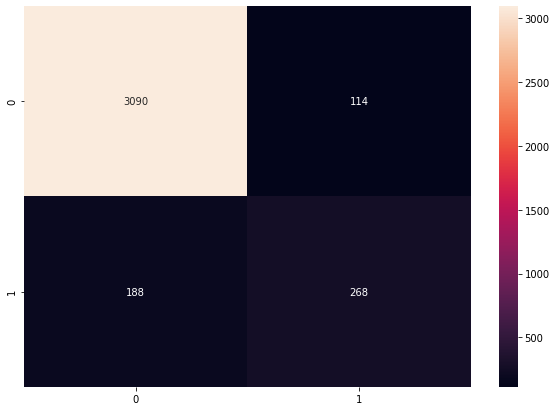

In [77]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

thank,great,love,awesome,amaze,best,flight,unite,jetblue,usairways,http,get,southwestair,would,much,appreciate,good,fly,make,rock,delay,please,help,virginamerica,go,guy,airline,thx,service,time,know,like,crew,us,hours,customer,wait,work,well,one,
 
 


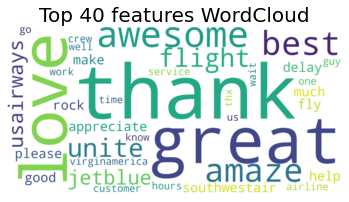

In [83]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

In [87]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(df_model['text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(14640, 500)

In [88]:
X = data_features
y = df_model['airline_sentiment']

In [89]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [90]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [92]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

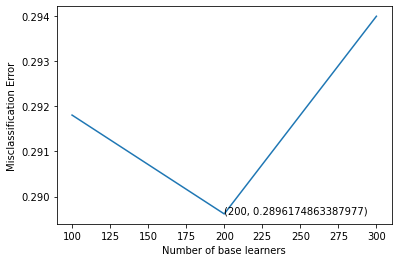

In [93]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [94]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['0' , '1']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3204
           1       0.74      0.54      0.63       456

    accuracy                           0.92      3660
   macro avg       0.84      0.76      0.79      3660
weighted avg       0.91      0.92      0.91      3660

Accuracy of the model is :  0.919672131147541


[[3119   85]
 [ 209  247]]


<AxesSubplot:>

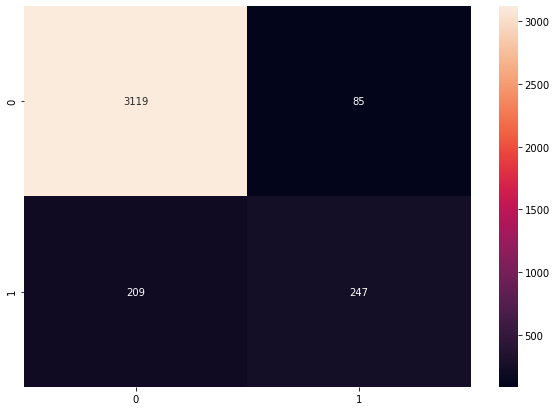

In [95]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

thank,great,jetblue,love,unite,southwestair,awesome,amaze,best,usairways,flight,http,virginamerica,much,good,get,appreciate,make,airline,fly,rock,crew,would,thx,guy,well,delay,please,service,help,cool,go,time,happy,know,always,like,work,see,nice,
 
 


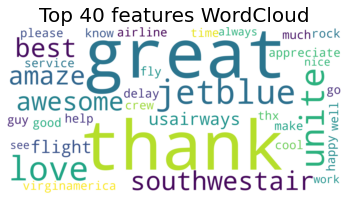

In [97]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## TF IDF

In [98]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(df_model['text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(14640, 500)

In [99]:
X = data_features
y = df_model['airline_sentiment']

In [100]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [101]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [102]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

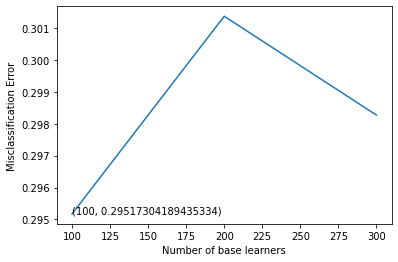

In [103]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [104]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['0' , '1']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3204
           1       0.76      0.53      0.62       456

    accuracy                           0.92      3660
   macro avg       0.85      0.75      0.79      3660
weighted avg       0.91      0.92      0.91      3660

Accuracy of the model is :  0.9207650273224044


[[3129   75]
 [ 215  241]]


<AxesSubplot:>

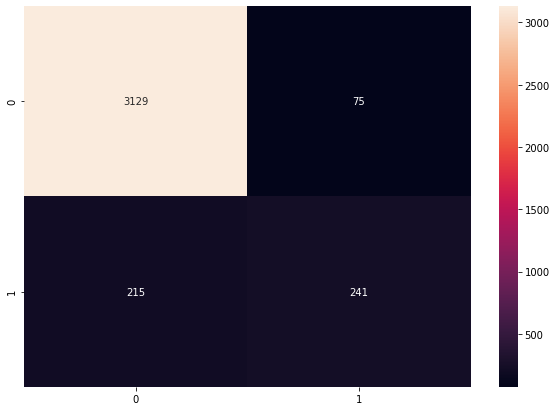

In [105]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

thank, great, jetblue, unite, love, southwestair, awesome, amaze, best, usairways, flight, http, good, much, virginamerica, get, appreciate, make, airline, fly, rock, guy, thx, would, crew, well, help, delay, cool, please, service, happy, time, like, always, helpful, go, nice, us, know, 
 
 


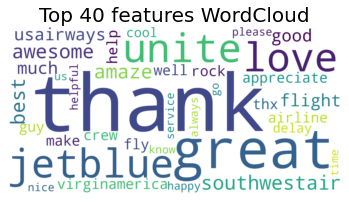

In [106]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## Countvectorizer vs TF IDF

In [107]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(),columns =['y_test'])
df['count_vectorizer_predicted'] = count_vectorizer_predicted
df['tf_idf_predicted'] = tf_idf_predicted
df.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,0,0


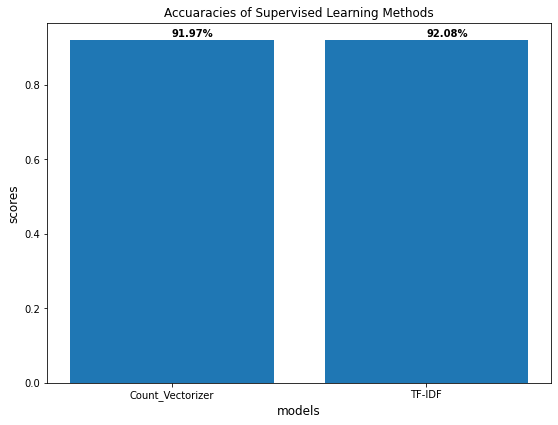

In [108]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

Observation : TD IDF performs better than count vectorizer


# Unsupervised Learning methods for Sentiment Analysis**

## VADER Sentiment Analysis


In [109]:
import nltk
#download vader lexicon
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kannansundararajan/nltk_data...


In [110]:
df_new = df_model.copy()   #make a copy of dataframe and do unsupervised operations on that dataframe

In [112]:
#Calculate the polarity score of the reviews
df_new['scores'] = df_new['text'].apply(lambda review: sentiment.polarity_scores(review))

df_new.head()

,text,airline_sentiment,scores
0,virginamerica dhepburn say,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,virginamerica plus add commercials experience ...,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,virginamerica today must mean need take anothe...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,virginamerica really aggressive blast obnoxiou...,0,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co..."
4,virginamerica really big bad thing,0,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp..."


In [114]:
#Calculate the compund score of the reviews
df_new['compound']  = df_new['scores'].apply(lambda score_dict: score_dict['compound'])

df_new.head()

,text,airline_sentiment,scores,compound
0,virginamerica dhepburn say,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,virginamerica plus add commercials experience ...,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,virginamerica today must mean need take anothe...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,virginamerica really aggressive blast obnoxiou...,0,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co...",-0.3306
4,virginamerica really big bad thing,0,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp...",-0.5829


In [115]:
#Classify the class of the review by keeping threshold on the compund score
df_new['comp_score'] = df_new['compound'].apply(lambda c: '1' if c >=0 else '0')
df_new.head()

,text,airline_sentiment,scores,compound,comp_score
0,virginamerica dhepburn say,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
1,virginamerica plus add commercials experience ...,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
2,virginamerica today must mean need take anothe...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
3,virginamerica really aggressive blast obnoxiou...,0,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co...",-0.3306,0
4,virginamerica really big bad thing,0,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp...",-0.5829,0


In [116]:
df_model["VADER_pred"] = df_new['comp_score'].tolist()
df_model.head()

,text,airline_sentiment,VADER_pred
0,virginamerica dhepburn say,0,1
1,virginamerica plus add commercials experience ...,1,1
2,virginamerica today must mean need take anothe...,0,1
3,virginamerica really aggressive blast obnoxiou...,0,0
4,virginamerica really big bad thing,0,0


In [119]:
#Calculate the accuracy of the Vader Sentiment Analysis
df_model["airline_sentiment"] = df_model["airline_sentiment"].astype(int)   #convert the sentiment column values into int data type
df_model["VADER_pred"] = df_model["VADER_pred"].astype(int) #convert the vader_predicted column values into int data type
print("Accuaracy using Vader Sentiment Analysis is : ",
      accuracy_score(df_model["airline_sentiment"].tolist(),df_model["VADER_pred"].tolist()))



Accuaracy using Vader Sentiment Analysis is :  0.4625


[[4496 7781]
 [  88 2275]]


<AxesSubplot:>

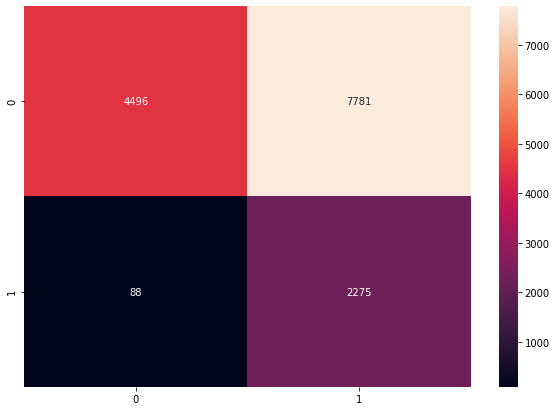

In [121]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(df_model["airline_sentiment"].tolist(), df_model['VADER_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## Textblob

In [122]:
from textblob import TextBlob

In [124]:
data_new = df_model.copy()      #make a copy of dataframe and do unsupervised operations on that dataframe

In [127]:
#Calculate the polarity score of the reviews
data_new['polarity']  = data_new['text'].apply(lambda review: TextBlob(review).sentiment.polarity)

data_new.head()

,text,airline_sentiment,VADER_pred,polarity
0,virginamerica dhepburn say,0,1,0.00000
1,virginamerica plus add commercials experience ...,1,1,0.00000
2,virginamerica today must mean need take anothe...,0,1,-0.31250
3,virginamerica really aggressive blast obnoxiou...,0,0,0.00625
4,virginamerica really big bad thing,0,0,-0.35000


In [128]:
#Classify the class of the review by keeping threshold on the polarity score
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,text,airline_sentiment,VADER_pred,polarity,polarity_score
0,virginamerica dhepburn say,0,1,0.00000,1
1,virginamerica plus add commercials experience ...,1,1,0.00000,1
2,virginamerica today must mean need take anothe...,0,1,-0.31250,0
3,virginamerica really aggressive blast obnoxiou...,0,0,0.00625,1
4,virginamerica really big bad thing,0,0,-0.35000,0


In [131]:
df_model["Text_Blob_pred"] = data_new['polarity_score'].tolist()
df_model.head()

,text,airline_sentiment,VADER_pred,Text_Blob_pred
0,virginamerica dhepburn say,0,1,1
1,virginamerica plus add commercials experience ...,1,1,1
2,virginamerica today must mean need take anothe...,0,1,0
3,virginamerica really aggressive blast obnoxiou...,0,0,1
4,virginamerica really big bad thing,0,0,0


In [133]:
#Calculate the accuracy of the Vader Sentiment Analysis
df_model["airline_sentiment"] = df_model["airline_sentiment"].astype(int)  #convert the sentiment column values into int data type
df_model["Text_Blob_pred"] = df_model["Text_Blob_pred"].astype(int)  #convert the textblob predicted column values into int data type
print("Accuaracy of using Text Blob Sentiment Analysis is : ",
      accuracy_score(df_model["airline_sentiment"].tolist(),df_model["Text_Blob_pred"].tolist()))



Accuaracy of using Text Blob Sentiment Analysis is :  0.3532103825136612


[[2910 9367]
 [ 102 2261]]


<AxesSubplot:>

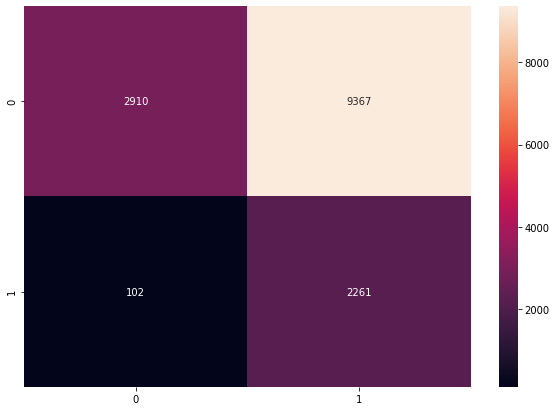

In [136]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(df_model["airline_sentiment"].tolist(), df_model['Text_Blob_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

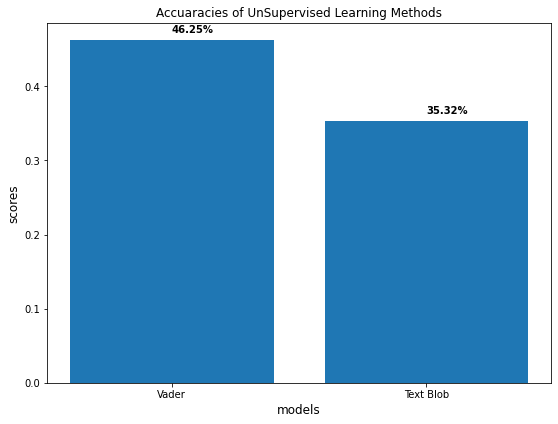

In [138]:
#plot the accuaracies of the text blob and Vader
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Vader', 'Text Blob']
# calculation accuracies of Vader and Textblob models using accuracy_score metrics
scores = [accuracy_score(df_model["airline_sentiment"].tolist(),df_model["VADER_pred"].tolist()),accuracy_score(df_model["airline_sentiment"].tolist(),df_model["Text_Blob_pred"].tolist())]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)   # y-axis labels
ax.set_xlabel('models',fontsize= 12)   # x-axis labels
ax.set_title('Accuaracies of UnSupervised Learning Methods')   #tittle of the graph
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

Obervation : Vader works better than Text Blob